In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pagos = pd.read_csv("../../data/raw/expensas_pagos.csv", 
                    sep=";", 
                    na_values = "NULL",
                    dtype = {
                        "id" : "object",
                        "expensa_id" :"object"
                    })

expensas = pd.read_csv("../../data/raw/expensas.csv",
                        sep=";", 
                        na_values = "NULL",
                        dtype = {
                            "id": "object",
                            "unidad_id": "object",
                            "propietario_id": "object",
                            "inquilino_id": "object",
                            "consorcio_id": "object"
                        })

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
%matplotlib inline

In [ ]:
pagos = pagos[pagos.fecha >= "2013-01-01"]
pagos.fecha = pd.to_datetime(pagos.fecha, format='%Y-%m-%d')

In [6]:
pagos.describe()

,metodo,monto
count,307822.000000,3.078220e+05
mean,2.956670,1.700809e+03
std,2.136701,3.541567e+03
min,0.000000,-1.259251e+05
25%,1.000000,4.768050e+02
50%,2.000000,1.240900e+03
75%,4.000000,2.367450e+03
max,11.000000,1.003318e+06


### Análisis de Montos

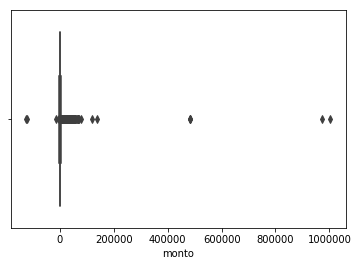

In [17]:
sns.boxplot(pagos.monto)

Hay muchos outliers, pagos en el orden de los 400.000 pesos. Muchas cosas no tienen sentido

In [12]:
pagos_aux = pagos.loc[(pagos.monto > 0) & (pagos.monto < 10000),:]

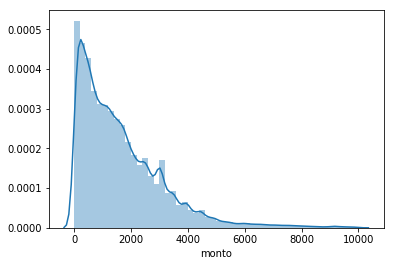

In [18]:
sns.distplot(pagos_aux.monto)

Ahi va tomando mejor forma, de todos modos este gráfico no es muy representativo por la inflación de Argentina.

In [20]:
pagos_aux.describe()

,metodo,monto
count,297742.000000,297742.000000
mean,3.003406,1653.939166
std,2.130750,1497.189181
min,0.000000,0.010000
25%,1.000000,518.430000
50%,2.000000,1276.200000
75%,4.000000,2381.160000
max,11.000000,9998.000000


In [33]:
pagos.columns

Index(['id', 'fecha', 'metodo', 'monto', 'expensa_id'], dtype='object')

### Analizar que pasa que hay pagos de monto tan bajo, menor a 3 pesos

In [34]:
expensas.describe()

,monto,monto_total,monto_parcial,saldo_utilizado_en_pago,monto_descuento,interes_pagado,monto_old,interes_pagado_old,monto_parcial_old,diferencia_pago,...,costo_eol,costo_comisionista,porcentaje_costo_eol,porcentaje_costo_comisionista,porcentaje_rapipago,porcentaje_pagomiscuentas,version,concepto_id,usuario_creador_id,deleted
count,4.531830e+05,4.531830e+05,453183.000000,453183.000000,453183.000000,453183.000000,453183.000000,453183.000000,453183.000000,453183.000000,...,453183.000000,453183.0,453183.000000,453183.0,453183.000000,453183.000000,453183.000000,453183.000000,453183.000000,453183.000000
mean,2.471518e+03,2.135616e+05,23.759821,0.042422,0.440175,3.680074,30.685742,0.174454,0.218424,0.003966,...,16.955931,0.0,0.958946,0.0,0.413191,0.387367,1.222495,95.062562,2075.817765,0.203542
std,2.351864e+05,4.114535e+05,457.669821,12.160085,64.362729,1444.175370,648.549891,8.133987,25.260847,1.728366,...,69.473296,0.0,1.561963,0.0,0.700271,0.656504,0.649214,275.705945,4641.750873,0.402633
min,-1.234560e+05,-1.234560e+05,-125925.120000,-0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-13.060000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.500000e+02,3.055908e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.190480e+03,9.537600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,2.353360e+03,2.404687e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,3.000000,0.0,1.600000,1.500000,1.000000,1.000000,0.000000,0.000000
max,8.038695e+07,8.038861e+07,59262.000000,6498.000000,37539.170000,971887.620000,336000.000000,763.580000,4089.740000,988.620000,...,4444.020000,0.0,4.810000,0.0,1.600000,1.500000,10.000000,1614.000000,16225.000000,1.000000


Quito las eliminadas

In [36]:
expensas_aux = expensas.loc[expensas.deleted == False]

In [41]:
expensas_aux.describe().T

,count,mean,std,min,25%,50%,75%,max
monto,360941.0,1654.586336,2781.502888,-123456.00,452.98,1181.44,2282.13,971887.62
monto_total,360941.0,221427.097908,356293.032864,-123456.00,31979.14,96422.11,243503.12,3946655.44
monto_parcial,360941.0,27.435731,507.064750,-125925.12,0.00,0.00,0.00,59262.00
saldo_utilizado_en_pago,360941.0,0.010713,4.043952,0.00,0.00,0.00,0.00,2184.19
monto_descuento,360941.0,0.145946,19.718391,0.00,0.00,0.00,0.00,7800.00
interes_pagado,360941.0,4.618405,1618.222817,0.00,0.00,0.00,0.00,971887.62
monto_old,360941.0,31.872695,710.653866,0.00,0.00,0.00,0.00,336000.00
interes_pagado_old,360941.0,0.219038,9.113743,0.00,0.00,0.00,0.00,763.58
monto_parcial_old,360941.0,0.274244,28.304962,0.00,0.00,0.00,0.00,4089.74
diferencia_pago,360941.0,0.004545,1.926838,0.00,0.00,0.00,0.00,988.62


,623,624,625,626,627
id,663,664,665,666,667
unidad_id,120,121,122,123,124
propietario_id,151,165,166,167,168
inquilino_id,0,0,0,0,0
fecha_vencimiento_1,0000-00-00,0000-00-00,0000-00-00,0000-00-00,0000-00-00
fecha_vencimiento_2,2018-02-25,2018-02-25,2018-02-25,2018-02-25,2018-02-25
vencimiento_fijado,NaN,NaN,NaN,NaN,NaN
fecha_emision,NaN,NaN,NaN,NaN,NaN
monto,413.1,234.6,212.5,222.7,214.2
monto_total,17000,17000,17000,17000,17000


In [121]:
pagos_timeline = pagos.groupby(by = "fecha").count()
pagos_timeline = pagos_timeline.reset_index()
pagos_timeline = pagos_timeline.loc[:,["fecha", "monto"]]

<IPython.core.display.Javascript object>


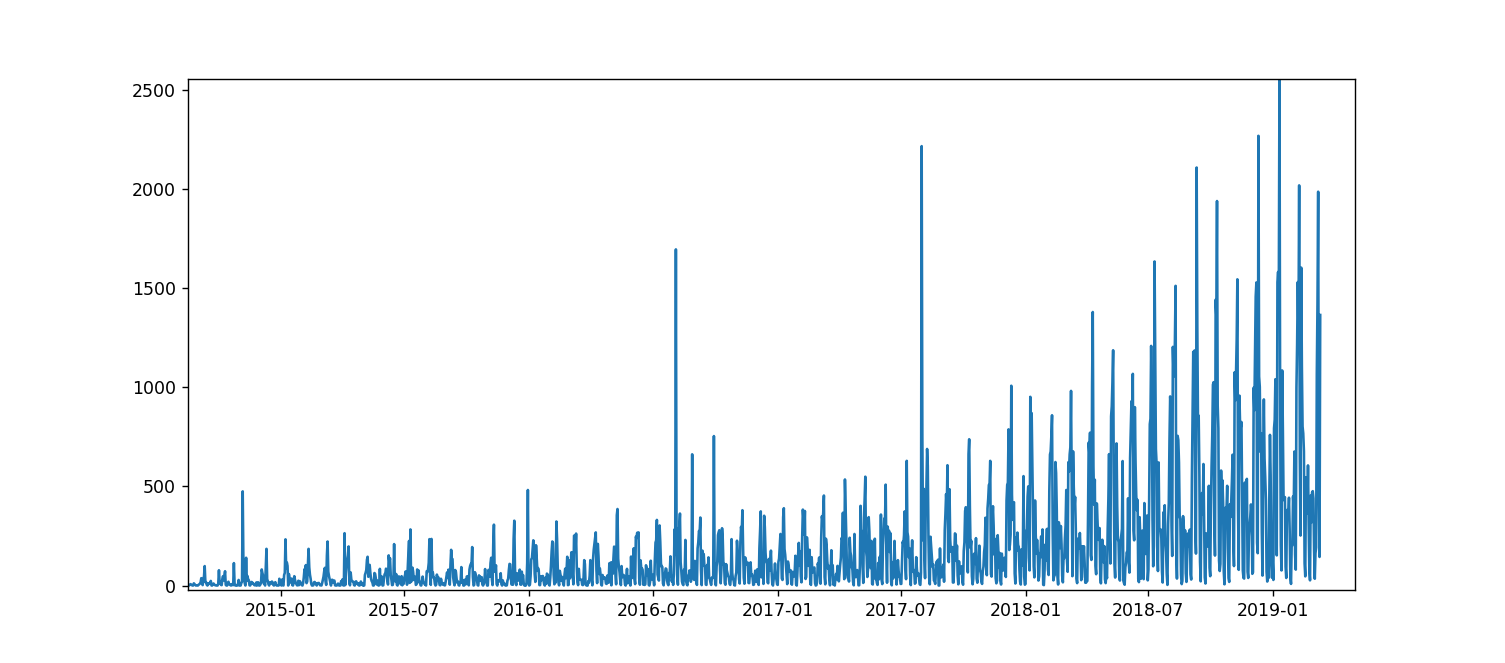

In [122]:
timeline = np.arange('2013-01-01', '2019-03-12', dtype='datetime64[D]')
pagos_complete = pd.DataFrame((timeline,np.zeros(len(timeline))))
pagos_complete = pagos_complete.T
pagos_complete.columns = ["fecha", "monto"]
pagos_complete.fecha = pd.to_datetime(pagos_complete.fecha, format='%Y-%m-%d')

pagos_complete = pagos_complete.merge(pagos_timeline, on="fecha", how="left")
pagos_complete = pagos_complete.fillna(0)
pagos_complete["cantidad"] = pagos_complete.monto_x + pagos_complete.monto_y
pagos_complete = pagos_complete.loc[:, ["fecha", "cantidad"]]

plt.plot(pagos_complete.fecha, pagos_complete.cantidad)

In [136]:
pagos_complete.sort_values(by="cantidad", ascending=False)

,fecha,cantidad
2200,2019-01-10,2557.0
2169,2018-12-10,2269.0
1673,2017-08-01,2217.0
2078,2018-09-10,2109.0
2229,2019-02-08,2019.0
2257,2019-03-08,1987.0
2108,2018-10-10,1940.0
1311,2016-08-04,1696.0
2016,2018-07-10,1635.0
2232,2019-02-11,1604.0


In [ ]:
exp_columns = list(expensas.columns) 
exp_columns[0] = "expensa_id"
expensas.columns = exp_columns

In [132]:
expensas = expensas[expensas.deleted < 1]

count    360941.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: deleted, dtype: float64

In [134]:
pagos.shape

(307764, 5)

In [135]:
expensas.shape

(360941, 38)

In [102]:
data = pagos.merge(expensas, on="expensa_id")

'0000-00-00'

In [111]:
data = data[data.unidad_id != "0"]

In [114]:
data[data.fecha_vencimiento_1 == "0000-00-00"]

,id,fecha,metodo,monto_x,expensa_id,unidad_id,propietario_id,inquilino_id,fecha_vencimiento_1,fecha_vencimiento_2,...,costo_eol,costo_comisionista,porcentaje_costo_eol,porcentaje_costo_comisionista,porcentaje_rapipago,porcentaje_pagomiscuentas,version,concepto_id,usuario_creador_id,deleted
4744,5330,2015-02-08,1,1003318.24,691,108,156,0,0000-00-00,2018-02-25,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
254172,262707,2018-12-12,1,1195.00,358499,42896,19469,0,0000-00-00,2018-02-28,...,0.0,0.0,0.0,0.0,0.0,0.0,1,13,16188,0
305833,315543,2019-03-11,3,353.00,435828,47859,24481,0,0000-00-00,2019-02-28,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,16213,0
305834,315544,2019-03-11,3,353.00,435829,47873,24495,0,0000-00-00,2019-02-28,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,16213,0
305835,315545,2019-03-11,3,353.00,435830,47874,24496,0,0000-00-00,2019-02-28,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,16213,0
305836,315546,2019-03-11,3,353.00,435831,47875,24497,0,0000-00-00,2019-02-28,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,16213,0
305837,315547,2019-03-11,3,353.00,435832,47876,24498,0,0000-00-00,2019-02-28,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,16213,0
305838,315548,2019-03-11,3,353.00,435833,47877,24499,0,0000-00-00,2019-02-28,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,16213,0
305839,315549,2019-03-11,3,353.00,435834,47878,24500,0,0000-00-00,2019-02-28,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,16213,0
305841,315551,2019-03-11,3,353.00,435835,47879,24501,0,0000-00-00,2019-02-28,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,16213,0


In [109]:
data.fecha_vencimiento_2.min()

'0000-00-00'

In [106]:
def convert_to_datetime(colname):
    data[colname] = pd.to_datetime(data[colname], format='%Y-%m-%d')
    
date_cols  = ['fecha', 'fecha_vencimiento_1', "fecha_vencimiento_2"]

for col in date_cols:
    convert_to_datetime(col)

ValueError: time data 0000-00-00 doesn't match format specified

In [117]:
expensas[expensas.deleted == 0].count()

expensa_id                       360941
unidad_id                        360941
propietario_id                   360941
inquilino_id                     360941
fecha_vencimiento_1              360941
fecha_vencimiento_2              360941
vencimiento_fijado                 3480
fecha_emision                    290596
monto                            360941
monto_total                      360941
monto_parcial                    360941
saldo_utilizado_en_pago          360941
monto_descuento                  360941
interes_pagado                   360941
monto_old                        360941
interes_pagado_old               360941
monto_parcial_old                360941
diferencia_pago                  360941
expensa_padre_id                 360941
int_dia                          360941
int_mes                          360941
mes                              360941
anio                             360941
unidad_denominacion              360935
unidad_prop                      360941
